Import Libraries and Dataset

In [4]:
import numpy as np

# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])


Activation Functions

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)


Initialize Network Parameters

In [6]:
# Set random seed for reproducibility
np.random.seed(0)

# Define sizes
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1  # Learning rate

# Randomly initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


Training Loop

In [7]:
# Train the network
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss
    loss = np.mean((y - a2) ** 2)

    # Backpropagation
    d_a2 = (a2 - y) * sigmoid_deriv(a2)
    d_a1 = d_a2.dot(W2.T) * sigmoid_deriv(a1)

    # Update weights and biases
    W2 -= a1.T.dot(d_a2) * lr
    b2 -= np.sum(d_a2, axis=0, keepdims=True) * lr
    W1 -= X.T.dot(d_a1) * lr
    b1 -= np.sum(d_a1, axis=0, keepdims=True) * lr

    # Print loss occasionally
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2696
Epoch 1000, Loss: 0.1750
Epoch 2000, Loss: 0.1461
Epoch 3000, Loss: 0.1368
Epoch 4000, Loss: 0.1329
Epoch 5000, Loss: 0.1308
Epoch 6000, Loss: 0.1296
Epoch 7000, Loss: 0.1287
Epoch 8000, Loss: 0.1281
Epoch 9000, Loss: 0.1277


Final Predictions

In [8]:
print("\nFinal predictions (MLP):")
for xi in X:
    hidden = sigmoid(np.dot(xi, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    print(f"Input: {xi}, Output: {np.round(output[0], 3)}")



Final predictions (MLP):
Input: [0 0], Output: [0.038]
Input: [0 1], Output: [0.499]
Input: [1 0], Output: [0.952]
Input: [1 1], Output: [0.504]


Decision Boundary Plot

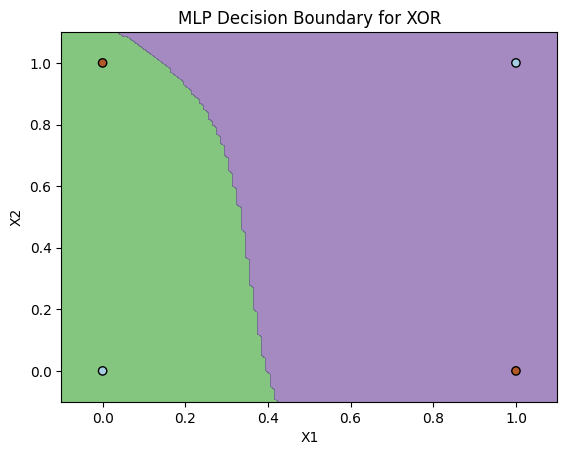

In [9]:
import matplotlib.pyplot as plt

def predict(X_input):
    a1 = sigmoid(np.dot(X_input, W1) + b1)
    a2 = sigmoid(np.dot(a1, W2) + b2)
    return a2 > 0.5

def plot_decision_boundary(pred_func):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = pred_func(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
    plt.title("MLP Decision Boundary for XOR")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(predict)
